# Import and Reading Data

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_excel("data/telecommunication.xlsx", engine='openpyxl').reset_index(drop=True)
df.sample(10)

,Customer ID,Month,Subscription Type,Data Used (GB),Minutes Used,Bill Amount (TL),City,Customer Satisfaction
122,44,January 2023,Postpaid,39.23,247.59,104.16,Istanbul,6
93,100,January 2023,Postpaid,20.75,495.53,272.86,Istanbul,7
492,99,February 2023,Prepaid,27.16,636.90,288.59,Izmir,4
301,85,March 2023,Postpaid,28.91,246.99,330.92,Antalya,7
361,37,April 2023,Postpaid,45.45,962.61,42.71,Bursa,5
423,40,June 2023,Postpaid,27.56,1253.35,275.70,Antalya,5
267,86,May 2023,Postpaid,29.82,1831.29,98.00,Bursa,4
167,14,June 2023,Prepaid,26.37,40.28,279.18,Istanbul,9
163,3,March 2023,Prepaid,24.12,268.86,484.46,Bursa,9
118,22,February 2023,Postpaid,1.71,2.23,248.60,Ankara,9


In [3]:
df.shape

(500, 8)

In [4]:
df.dtypes

Customer ID                int64
Month                     object
Subscription Type         object
Data Used (GB)           float64
Minutes Used             float64
Bill Amount (TL)         float64
City                      object
Customer Satisfaction      int64
dtype: object

In [5]:
df.describe()

,Customer ID,Data Used (GB),Minutes Used,Bill Amount (TL),Customer Satisfaction
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,49.710000,25.388100,990.843500,262.440720,5.568000
std,28.671135,14.551107,584.390965,139.177114,2.942566
min,1.000000,0.100000,2.230000,10.090000,1.000000
25%,25.000000,12.385000,494.622500,137.495000,3.000000
50%,49.000000,25.700000,986.145000,265.385000,6.000000
75%,74.000000,37.830000,1521.682500,383.170000,8.000000
max,100.000000,49.900000,1999.710000,499.610000,10.000000


In [6]:
df.columns

Index(['Customer ID', 'Month', 'Subscription Type', 'Data Used (GB)',
       'Minutes Used', 'Bill Amount (TL)', 'City', 'Customer Satisfaction'],
      dtype='object')

In [7]:
df['Customer ID'].nunique()

100

In [8]:
df.Month.unique()

array(['January 2023', 'March 2023', 'May 2023', 'April 2023',
       'June 2023', 'February 2023'], dtype=object)

In [9]:
df['City'].unique()

array(['Antalya', 'Ankara', 'Istanbul', 'Bursa', 'Izmir'], dtype=object)

In [10]:
df[df['Data Used (GB)'] == 0.1]

,Customer ID,Month,Subscription Type,Data Used (GB),Minutes Used,Bill Amount (TL),City,Customer Satisfaction
298,19,April 2023,Prepaid,0.1,738.2,43.14,Bursa,10


# Cleaning Data

In [11]:
df.isnull().sum()

Customer ID              0
Month                    0
Subscription Type        0
Data Used (GB)           0
Minutes Used             0
Bill Amount (TL)         0
City                     0
Customer Satisfaction    0
dtype: int64

In [12]:
duplicates = df[df.duplicated()]
len(duplicates)

0

# Data Exploration

In [13]:
pivot_table = pd.pivot_table(df, 
                             values=['Bill Amount (TL)', 'Customer Satisfaction'], 
                             index='City', 
                             aggfunc={'Bill Amount (TL)': 'sum', 'Customer Satisfaction': 'mean'})
pivot_table

,Bill Amount (TL),Customer Satisfaction
City,,
Ankara,27023.77,5.722222
Antalya,24247.38,5.474227
Bursa,25688.61,5.408602
Istanbul,29799.38,5.535714
Izmir,24461.22,5.688889


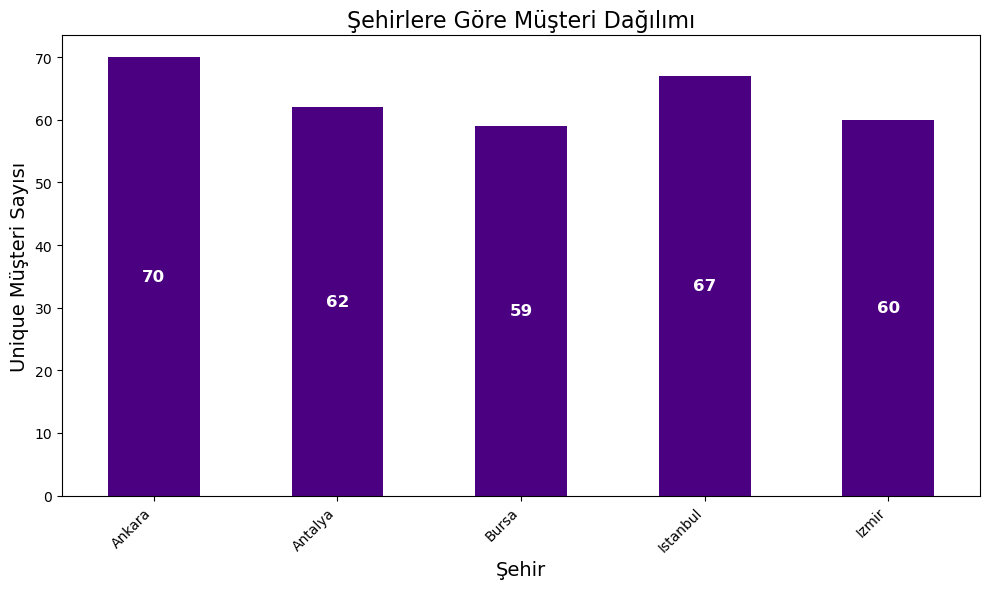

In [14]:
unique_customers_per_city = df.groupby('City')['Customer ID'].nunique()

plt.figure(figsize=(10, 6))
ax = unique_customers_per_city.plot(kind='bar', color="indigo")

plt.title('Şehirlere Göre Müşteri Dağılımı', fontsize=16)
plt.xlabel('Şehir', fontsize=14)
plt.ylabel('Unique Müşteri Sayısı', fontsize=14)

plt.xticks(rotation=45, ha="right")

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), 
                (p.get_x() + p.get_width() / 2., p.get_height() / 2.), 
                ha='center', va='center', 
                fontsize=12, color='white', fontweight='bold')

plt.tight_layout()
plt.show()

In [15]:
unique_customers_per_city

City
Ankara      70
Antalya     62
Bursa       59
Istanbul    67
Izmir       60
Name: Customer ID, dtype: int64

In [16]:
np.array(sorted(df.groupby('City')['Customer ID'].unique()['Ankara']))

array([  1,   2,   3,   5,   7,   9,  10,  11,  12,  13,  14,  17,  18,
        21,  22,  24,  25,  26,  27,  29,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  44,  45,  46,  47,  48,  49,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  65,  66,  68,
        73,  74,  76,  77,  80,  81,  82,  84,  86,  88,  90,  92,  93,
        94,  95,  96,  97, 100])

In [17]:
np.array(sorted(df.groupby('City')['Customer ID'].unique()['Istanbul']))

array([  1,   2,   4,   5,   8,   9,  10,  12,  13,  14,  15,  17,  19,
        20,  21,  22,  23,  24,  27,  31,  32,  33,  35,  37,  38,  41,
        43,  44,  45,  47,  49,  50,  52,  54,  55,  58,  59,  60,  61,
        62,  64,  66,  68,  69,  70,  71,  72,  73,  74,  76,  77,  78,
        81,  82,  83,  84,  86,  87,  89,  90,  92,  93,  94,  95,  96,
        99, 100])

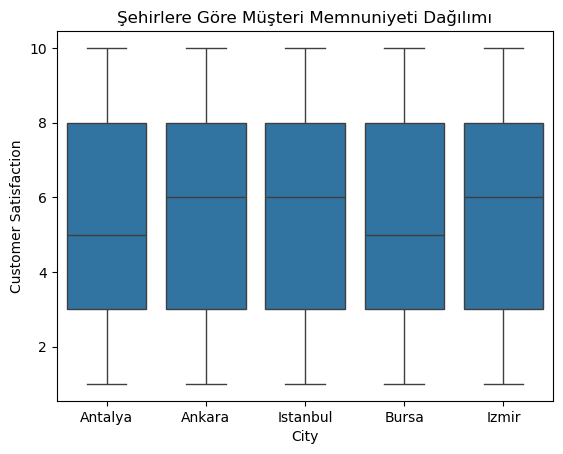

In [18]:
sns.boxplot(x='City', y='Customer Satisfaction', data=df)
plt.title('Şehirlere Göre Müşteri Memnuniyeti Dağılımı')
plt.show()

In [19]:
df.groupby("City")["Customer Satisfaction"].agg(["median", "min", "max"])

,median,min,max
City,,,
Ankara,6.0,1,10
Antalya,5.0,1,10
Bursa,5.0,1,10
Istanbul,6.0,1,10
Izmir,6.0,1,10


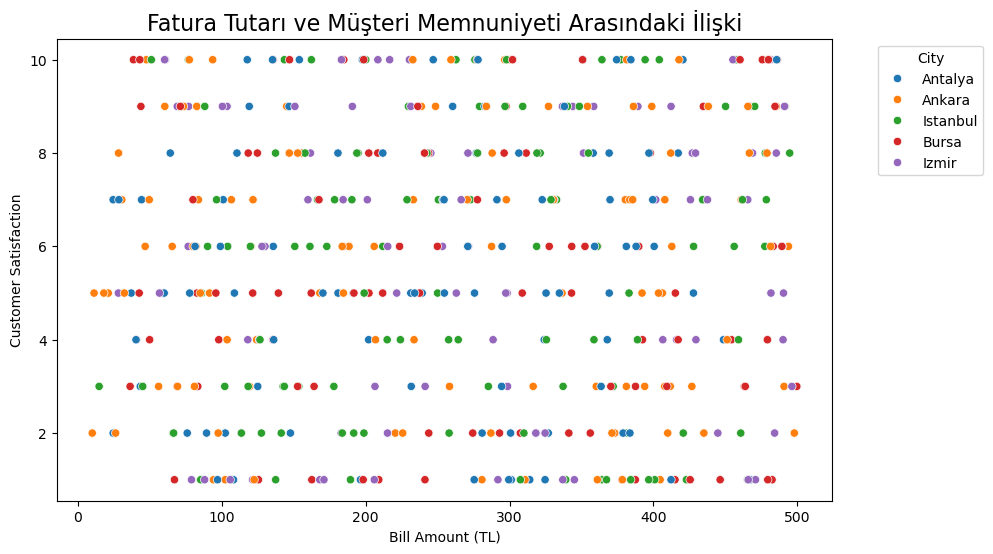

In [20]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Bill Amount (TL)', y='Customer Satisfaction', hue='City', data=df)
plt.title('Fatura Tutarı ve Müşteri Memnuniyeti Arasındaki İlişki', fontsize=16)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

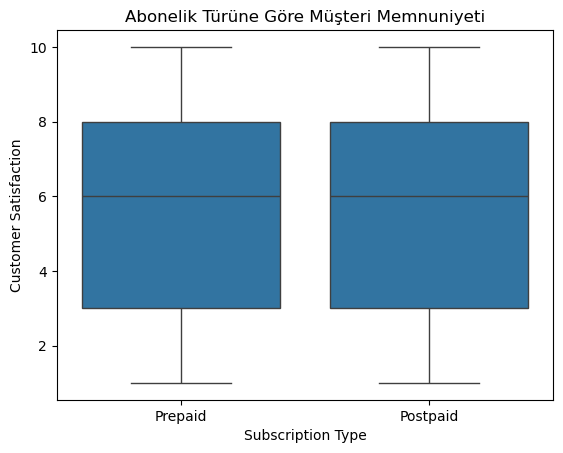

In [21]:
sns.boxplot(x='Subscription Type', y='Customer Satisfaction', data=df)
plt.title('Abonelik Türüne Göre Müşteri Memnuniyeti')
plt.show()

In [22]:
months = ['January 2023', 'February 2023', 'March 2023', 'April 2023', 'May 2023', 'June 2023']
df['Month'] = pd.Categorical(df['Month'], categories=months, ordered=True)
avg_bill = df.groupby('Month', observed=True)[['Bill Amount (TL)']].mean()

avg_bill

,Bill Amount (TL)
Month,
January 2023,248.369494
February 2023,257.941299
March 2023,251.556471
April 2023,270.654819
May 2023,283.357024
June 2023,261.837500


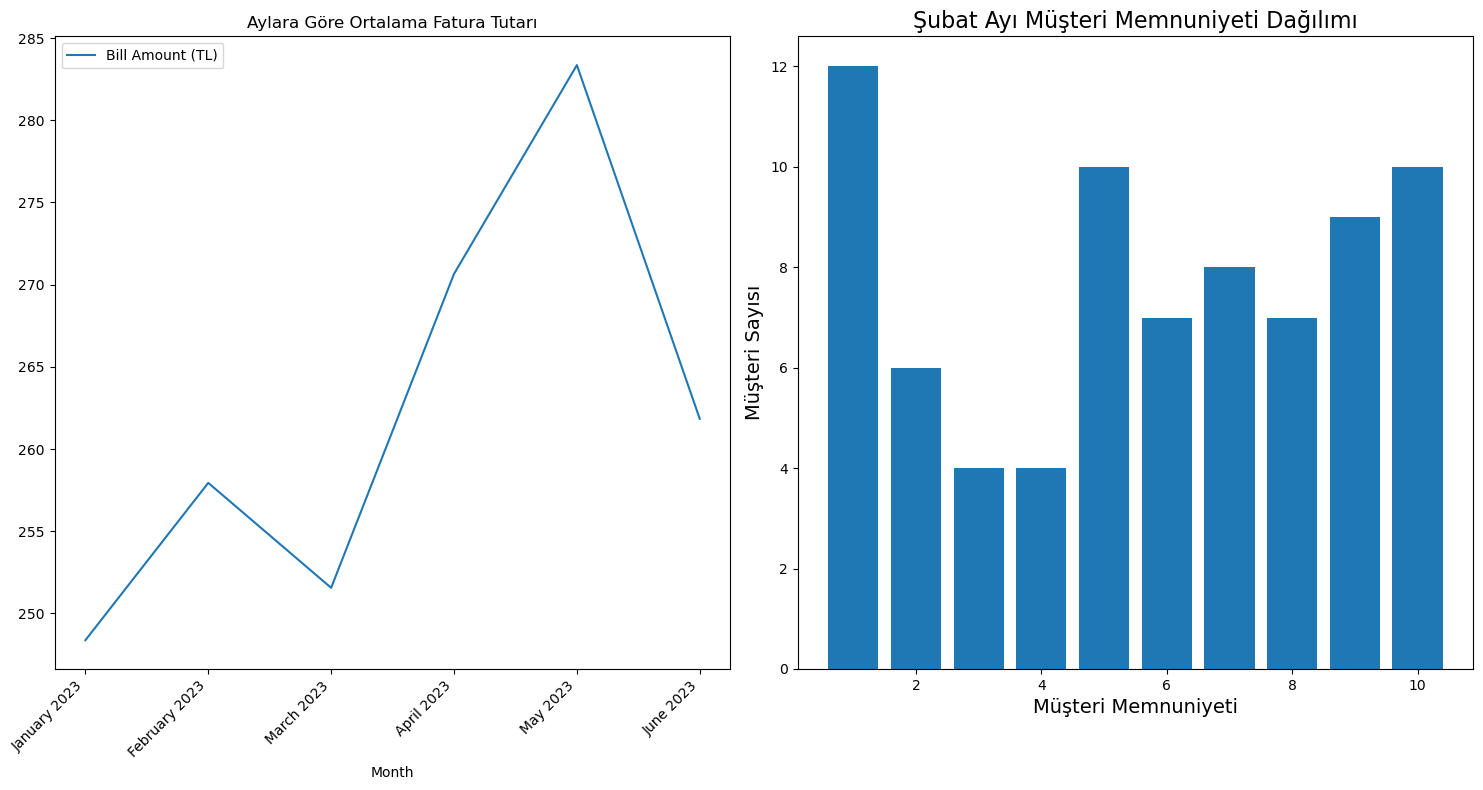

In [23]:
satisfaction_for_february = df[df["Month"] == "February 2023"]['Customer Satisfaction'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
avg_bill.plot(kind='line', title='Aylara Göre Ortalama Fatura Tutarı', ax=ax[0])

ax[0].set_xticks(range(len(avg_bill.index)))
ax[0].set_xticklabels(avg_bill.index, rotation=45, ha="right")


ax[1].bar(x=satisfaction_for_february.index, height=satisfaction_for_february.values)
ax[1].set_title('Şubat Ayı Müşteri Memnuniyeti Dağılımı', fontsize=16)
ax[1].set_xlabel('Müşteri Memnuniyeti', fontsize=14)
ax[1].set_ylabel('Müşteri Sayısı', fontsize=14)

plt.tight_layout()
plt.show()

In [24]:
customers_per_month = df.groupby('Month', observed=True)['Customer ID'].nunique()
customers_per_month

Month
January 2023     53
February 2023    52
March 2023       58
April 2023       54
May 2023         56
June 2023        64
Name: Customer ID, dtype: int64

In [25]:
months_set = df.groupby('Month', observed=True)['Customer ID'].apply(set)

different_customers = months_set['February 2023'].difference(months_set['March 2023'])

print(different_customers)

{2, 5, 6, 8, 11, 15, 19, 20, 22, 32, 37, 38, 39, 41, 44, 46, 54, 57, 64, 66, 71, 73, 81, 82, 88, 96}


In [26]:
different_customers_as_array = np.array(list(different_customers))
different_customers_as_array

array([ 2,  5,  6,  8, 11, 15, 19, 20, 22, 32, 37, 38, 39, 41, 44, 46, 54,
       57, 64, 66, 71, 73, 81, 82, 88, 96])

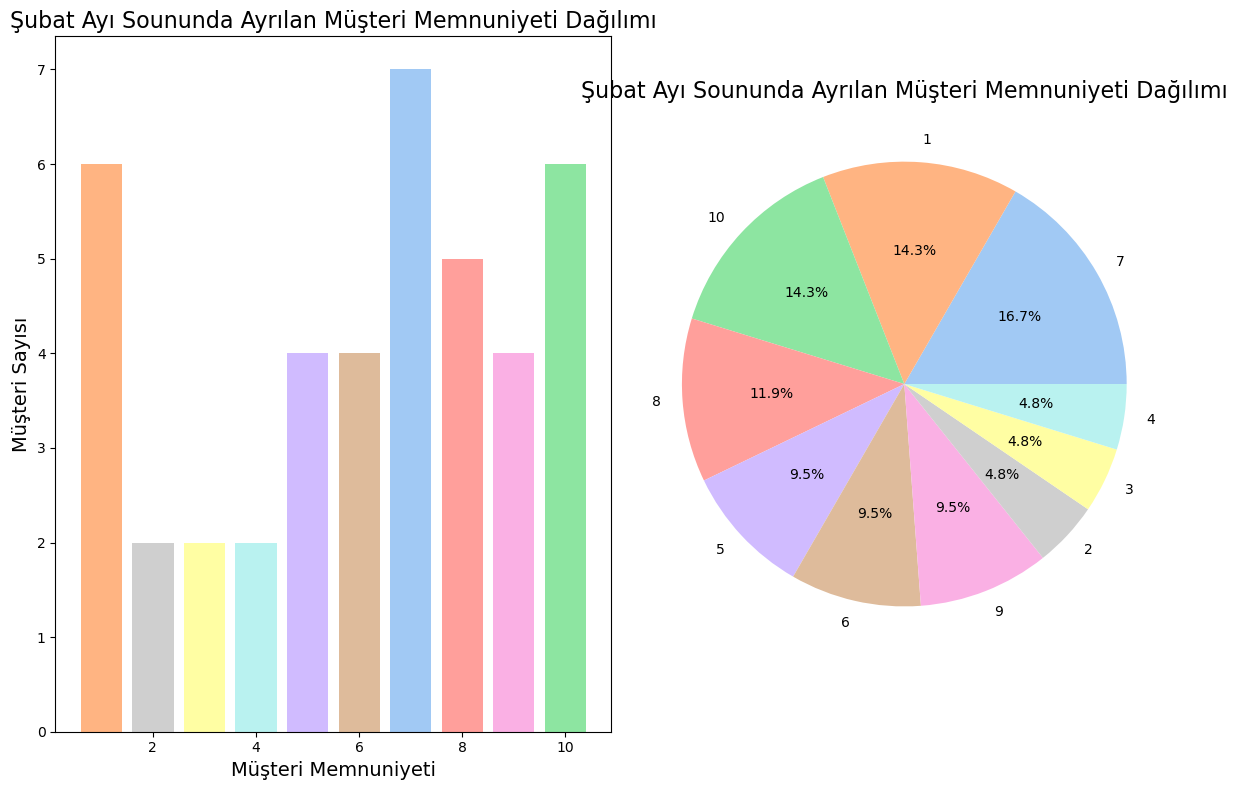

In [27]:
filtered = (df["Customer ID"].isin(different_customers_as_array)) & (df['Month'] == "February 2023")
february_difference_march_df = df[filtered]
feb_satisfaction = february_difference_march_df.value_counts('Customer Satisfaction')
feb_satisfaction_percent = feb_satisfaction / feb_satisfaction.sum() * 100

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.bar(x=feb_satisfaction.index, height=feb_satisfaction.values, color=sns.color_palette("pastel"))
plt.title('Şubat Ayı Soununda Ayrılan Müşteri Memnuniyeti Dağılımı', fontsize=16)
plt.xlabel('Müşteri Memnuniyeti', fontsize=14)
plt.ylabel('Müşteri Sayısı', fontsize=14)

plt.subplot(1, 2, 2)
# Pasta grafiği çizimi
plt.pie(feb_satisfaction_percent, labels=feb_satisfaction_percent.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Şubat Ayı Soununda Ayrılan Müşteri Memnuniyeti Dağılımı', fontsize=16)

plt.tight_layout()
plt.show()

In [28]:
df.groupby('Month', observed=True)['Customer ID'].size()

Month
January 2023     79
February 2023    77
March 2023       85
April 2023       83
May 2023         84
June 2023        92
Name: Customer ID, dtype: int64

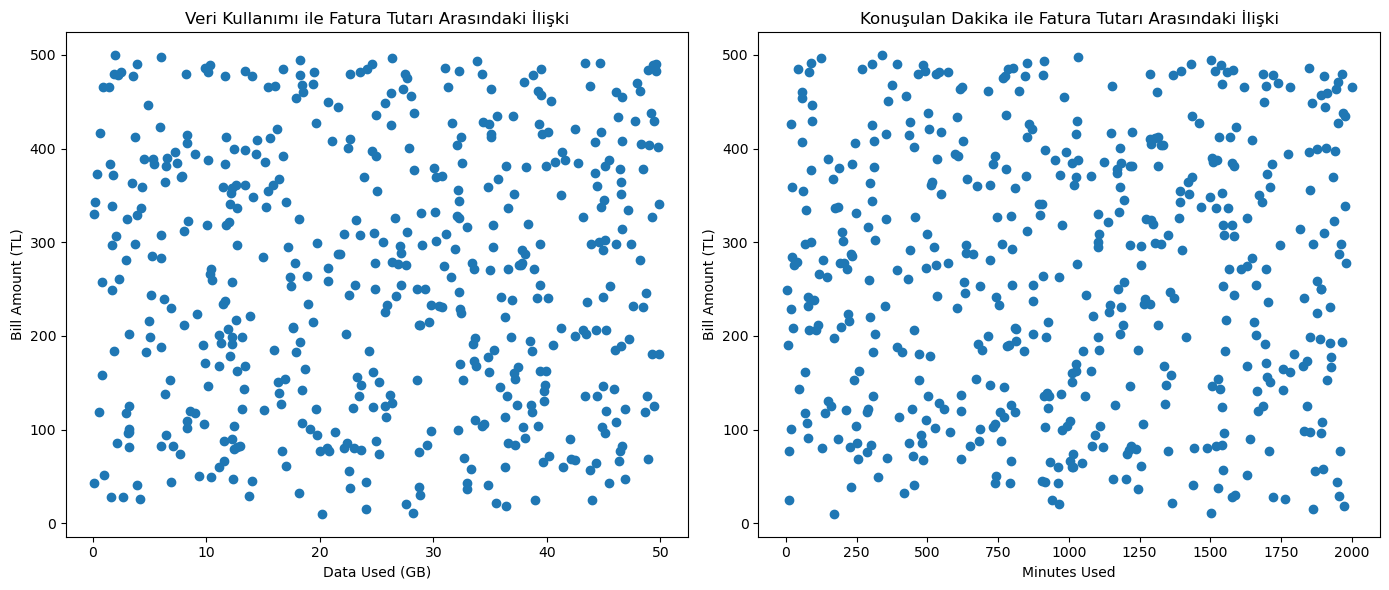

In [29]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(df['Data Used (GB)'], df['Bill Amount (TL)'])
plt.title('Veri Kullanımı ile Fatura Tutarı Arasındaki İlişki')
plt.xlabel('Data Used (GB)')
plt.ylabel('Bill Amount (TL)')

plt.subplot(1, 2, 2)
plt.scatter(df['Minutes Used'], df['Bill Amount (TL)'])
plt.title('Konuşulan Dakika ile Fatura Tutarı Arasındaki İlişki')
plt.xlabel('Minutes Used')
plt.ylabel('Bill Amount (TL)')

plt.tight_layout()

plt.show()

# Correlation and Regression Analysis

In [30]:
correlation = df[['Bill Amount (TL)', 'Customer Satisfaction']].corr().iloc[0,1]
formatted_correlation = "{:.3f}".format(correlation)
print("Pearson Korelasyon Katsayısı:", correlation)

Pearson Korelasyon Katsayısı: 0.017133080466482157


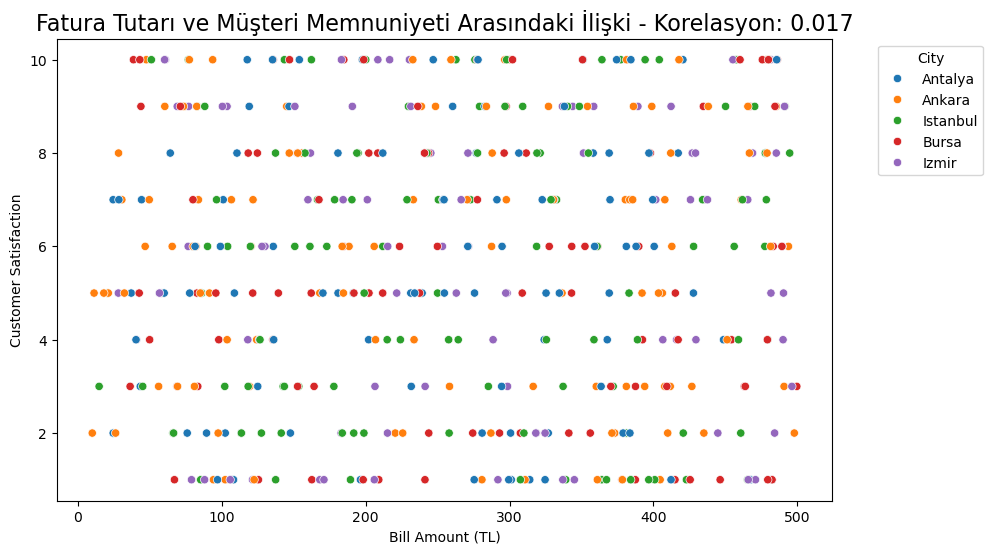

In [31]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Bill Amount (TL)', y='Customer Satisfaction', hue='City', data=df)
plt.title(f'Fatura Tutarı ve Müşteri Memnuniyeti Arasındaki İlişki - Korelasyon: {formatted_correlation}', fontsize=16)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [32]:
X = df['Bill Amount (TL)']
y = df['Customer Satisfaction']

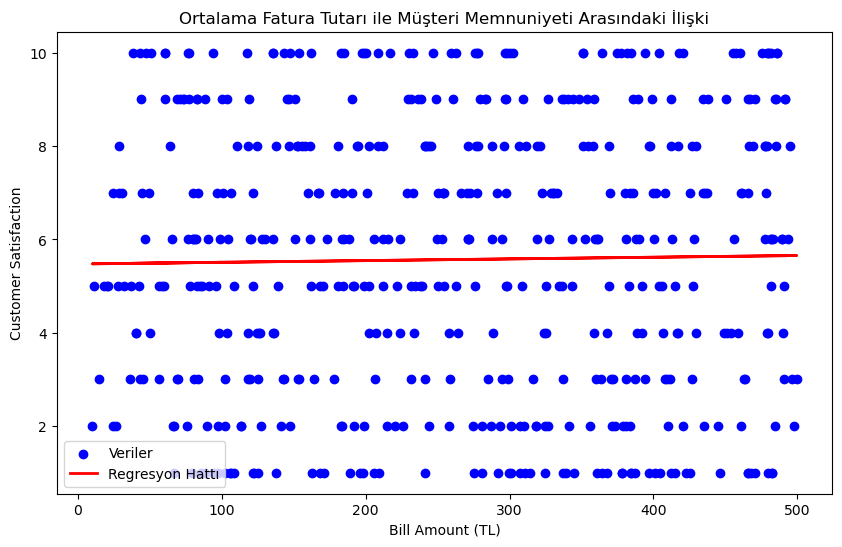

In [33]:
X = np.array(X).reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Veriler')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regresyon Hattı')
plt.title('Ortalama Fatura Tutarı ile Müşteri Memnuniyeti Arasındaki İlişki')
plt.xlabel('Bill Amount (TL)')
plt.ylabel('Customer Satisfaction')
plt.legend()
plt.show()

In [34]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 8.638839389349814
R-squared: 0.0002935424462707781


In [35]:
avg_bill_per_customer = df.groupby('Customer ID')['Bill Amount (TL)'].mean()
avg_bill_per_customer

Customer ID
1      334.584545
2      347.240000
3      244.766000
4      310.121250
5      184.325000
          ...    
96     213.850000
97      97.685000
98     211.196667
99     188.695000
100    292.087143
Name: Bill Amount (TL), Length: 100, dtype: float64

In [36]:
avg_bill_vs_satisfaction = df[['Customer ID', 'Customer Satisfaction']].drop_duplicates().set_index('Customer ID')
avg_bill_vs_satisfaction['Avg Bill Amount (TL)'] = avg_bill_per_customer

In [37]:
avg_bill_vs_satisfaction

,Customer Satisfaction,Avg Bill Amount (TL)
Customer ID,,
45,5,232.328000
48,3,201.590000
65,7,326.332500
68,3,260.093333
10,3,277.941429
...,...,...
75,7,311.723333
99,4,188.695000
98,7,211.196667


In [38]:
avg_satisfaction_per_customer = avg_satisfaction_per_customer = df.groupby('Customer ID').agg({
    'Customer Satisfaction': 'mean',
    'Bill Amount (TL)': 'mean'
})
avg_satisfaction_per_customer['Rounded_Satisfaction'] = avg_satisfaction_per_customer['Customer Satisfaction'].round()
avg_satisfaction_per_customer

,Customer Satisfaction,Bill Amount (TL),Rounded_Satisfaction
Customer ID,,,
1,4.818182,334.584545,5.0
2,7.250000,347.240000,7.0
3,5.600000,244.766000,6.0
4,5.125000,310.121250,5.0
5,7.500000,184.325000,8.0
...,...,...,...
96,5.333333,213.850000,5.0
97,4.000000,97.685000,4.0
98,7.333333,211.196667,7.0


Korelasyon Katsayısı: 0.114


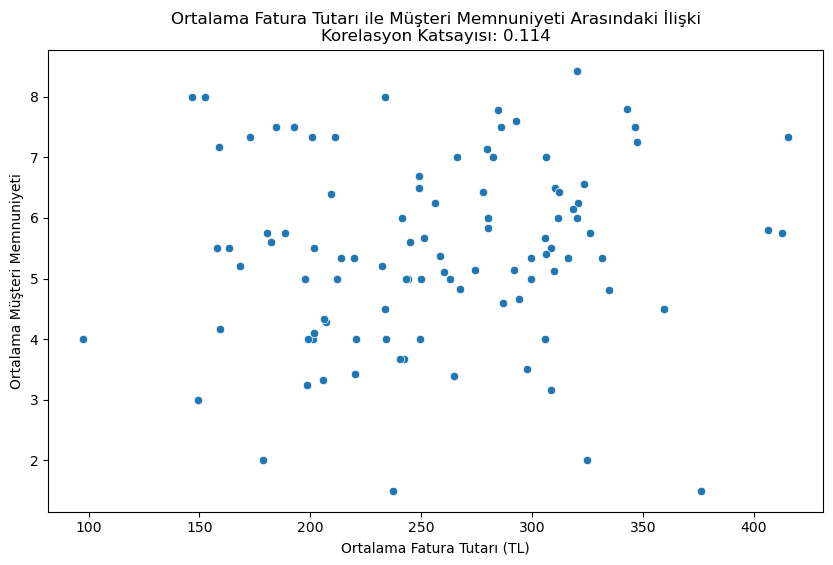

In [39]:
correlation = avg_satisfaction_per_customer['Bill Amount (TL)'].corr(avg_satisfaction_per_customer['Customer Satisfaction'])
print(f"Korelasyon Katsayısı: {correlation:.3f}")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bill Amount (TL)', y='Customer Satisfaction', data=avg_satisfaction_per_customer)
plt.title(f'Ortalama Fatura Tutarı ile Müşteri Memnuniyeti Arasındaki İlişki\nKorelasyon Katsayısı: {correlation:.3f}')
plt.xlabel('Ortalama Fatura Tutarı (TL)')
plt.ylabel('Ortalama Müşteri Memnuniyeti')
plt.show()

## Customer Segmentetion

In [40]:
# Her müşteri için ortalama fatura tutarını hesaplama
avg_bill_per_customer = df.groupby('Customer ID')['Bill Amount (TL)'].mean()

# Müşterileri segmentlere ayırma (düşük, orta, yüksek)
avg_bill_per_customer = pd.DataFrame(avg_bill_per_customer)
avg_bill_per_customer['Segment'] = pd.qcut(avg_bill_per_customer['Bill Amount (TL)'], q=3, labels=['Düşük', 'Orta', 'Yüksek'])

# Segmentlerle müşteri memnuniyetini birleştirme
avg_satisfaction_per_customer = df.groupby('Customer ID')['Customer Satisfaction'].mean()
avg_bill_per_customer['Avg Satisfaction'] = avg_satisfaction_per_customer

avg_bill_per_customer.head()

,Bill Amount (TL),Segment,Avg Satisfaction
Customer ID,,,
1,334.584545,Yüksek,4.818182
2,347.240000,Yüksek,7.250000
3,244.766000,Orta,5.600000
4,310.121250,Yüksek,5.125000
5,184.325000,Düşük,7.500000


In [41]:
# Segmentlere göre ortalama müşteri memnuniyeti
segment_satisfaction = avg_bill_per_customer.groupby('Segment', observed=True)['Avg Satisfaction'].mean()
segment_satisfaction

Segment
Düşük     5.270635
Orta      5.504050
Yüksek    5.585820
Name: Avg Satisfaction, dtype: float64

/var/folders/r2/9ll477s10d7gz6rx5kpl7c500000gn/T/ipykernel_50344/3003785510.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_satisfaction.index, y=segment_satisfaction.values, palette='pastel')


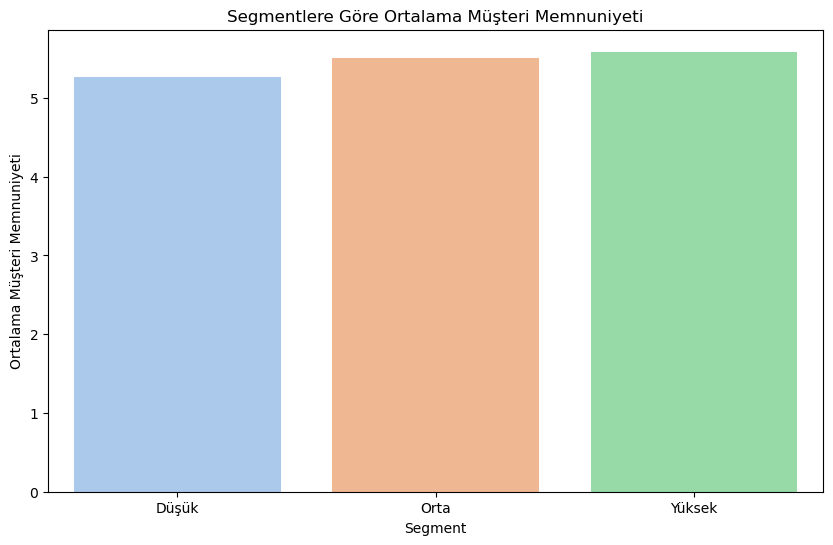

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_satisfaction.index, y=segment_satisfaction.values, palette='pastel')
plt.title('Segmentlere Göre Ortalama Müşteri Memnuniyeti')
plt.xlabel('Segment')
plt.ylabel('Ortalama Müşteri Memnuniyeti')
plt.show()

In [45]:
low_segment = avg_bill_per_customer[avg_bill_per_customer['Segment'] == 'Düşük']['Avg Satisfaction']
mid_segment = avg_bill_per_customer[avg_bill_per_customer['Segment'] == 'Orta']['Avg Satisfaction']
high_segment = avg_bill_per_customer[avg_bill_per_customer['Segment'] == 'Yüksek']['Avg Satisfaction']

f_statistic, p_value = stats.f_oneway(low_segment, mid_segment, high_segment)

print(f"ANOVA Testi F-İstatistiği: {f_statistic:.3f}")
print(f"ANOVA Testi P-Değeri: {p_value:.3f}")

ANOVA Testi F-İstatistiği: 0.383
ANOVA Testi P-Değeri: 0.683
